In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim
import torchvision.models as models
import torch.nn.functional as Fun
from torch.utils.data import TensorDataset, DataLoader
import torch.utils.data as data
from torchsummary import summary
from tqdm import tqdm

import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

### **Load CIFAR-100 Dataset**

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Mother Train Set
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)

# Test Set
batch_size = 32
testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# TrainSet 1
trainset1_size = 5000
trainset1 = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainset1.targets = trainset.targets[:trainset1_size]
trainset1.data = trainset.data[:trainset1_size]

batch_size = 32
trainloader_train_set_1 = torch.utils.data.DataLoader(trainset1, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Train Set 2
trainset2_size = 25000
trainset2 = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainset2.targets = trainset.targets[:trainset2_size]
trainset2.data = trainset.data[:trainset2_size]

batch_size = 32
trainloader_train_set_2 = torch.utils.data.DataLoader(trainset2, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

100%|██████████| 169001437/169001437 [00:01<00:00, 103967112.03it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Function to plot multiple images
def plot_images(images, labels, num_images=9):
    num_rows = int(num_images / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(3):
            idx = i * 3 + j
            if idx < num_images:
                axes[i, j].imshow(images[idx])
                axes[i, j].set_title(f"Label: {labels[idx]}")
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
    plt.show()

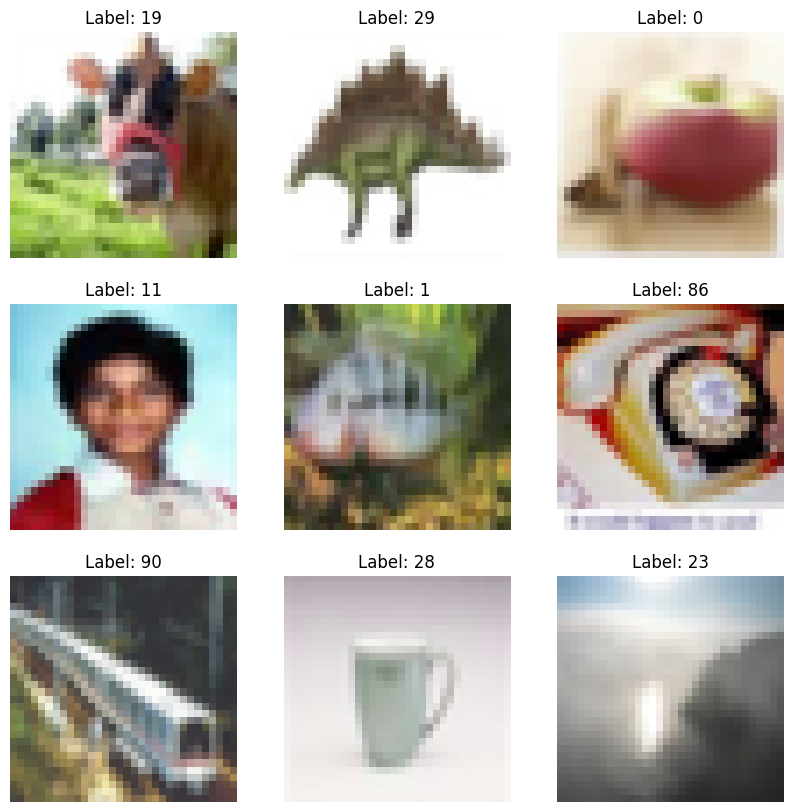

In [4]:
plot_images(trainset2.data, trainset2.targets, num_images=9 )

### **1. Image Classification**

In [ ]:
# Defining ResNet18 Model

class ResNet18(nn.Module):
    def __init__(self, pretrained=True):
        super(ResNet18, self).__init__()

        # Load pretrained ResNet-18 backbone

        resnet18 = models.resnet18(pretrained=pretrained)
        self.fc = torch.nn.Linear(1000,100)
        self.softmax = torch.nn.Softmax(dim=1)
        self.relu = torch.nn.ReLU()
        self.model = resnet18

    def forward(self, x):

        x = self.model(x)
        x = self.fc(x)

        return x

In [ ]:
# Training the Model on TrainSet 1

model_1 = ResNet18(pretrained=True)

# Defining the optimizer
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

# Moving the model and loss function to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_1.to(device)
# Defining the loss function
criterion = nn.CrossEntropyLoss()
criterion.to(device)

# Training the model
epochs = 10
loss_list = []
model_1.train()
for epoch in range(epochs):

    running_loss = 0.0
    for i,(inputs, labels) in enumerate(tqdm(trainloader_train_set_1)):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_list.append(running_loss/len(trainloader_train_set_1))

    print(f'Epoch: {epoch+1}/{epochs} , Training Loss: {loss.item():.4f}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 157/157 [00:03<00:00, 42.65it/s]


Epoch: 1/10 , Training Loss: 5.9425


100%|██████████| 157/157 [00:04<00:00, 33.59it/s]


Epoch: 2/10 , Training Loss: 4.1365


100%|██████████| 157/157 [00:03<00:00, 43.35it/s]


Epoch: 3/10 , Training Loss: 3.8504


100%|██████████| 157/157 [00:03<00:00, 43.05it/s]


Epoch: 4/10 , Training Loss: 4.2312


100%|██████████| 157/157 [00:04<00:00, 37.30it/s]


Epoch: 5/10 , Training Loss: 4.4835


100%|██████████| 157/157 [00:04<00:00, 38.82it/s]


Epoch: 6/10 , Training Loss: 4.4570


100%|██████████| 157/157 [00:03<00:00, 43.17it/s]


Epoch: 7/10 , Training Loss: 4.3736


100%|██████████| 157/157 [00:03<00:00, 41.43it/s]


Epoch: 8/10 , Training Loss: 3.0492


100%|██████████| 157/157 [00:04<00:00, 35.07it/s]


Epoch: 9/10 , Training Loss: 3.2595


100%|██████████| 157/157 [00:03<00:00, 42.51it/s]

Epoch: 10/10 , Training Loss: 8.4651


In [ ]:
# Additional information
EPOCH = 10
PATH = "model_1.pt"
LOSS = loss_list[-1]

torch.save({
            'epoch': EPOCH,
            'model_state_dict': model_1.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': LOSS,
            }, PATH)

In [ ]:
# Training the Model on TrainSet 2

model_2 = ResNet18(pretrained=True)

# Defining the optimizer
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# Moving the model and loss function to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_2.to(device)
# Defining the loss function
criterion = nn.CrossEntropyLoss()
criterion.to(device)

# Training the model
epochs = 10
loss_list = []
model_2.train()
for epoch in range(epochs):
    running_loss = 0.0
    for i,(inputs, labels) in enumerate(tqdm(trainloader_train_set_2)):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_list.append(running_loss/len(trainloader_train_set_2))
    print(f'Epoch: {epoch+1}/{epochs} , Training Loss: {loss.item():.4f}')

100%|██████████| 782/782 [00:18<00:00, 41.76it/s]


Epoch: 1/10 , Training Loss: 4.9325


100%|██████████| 782/782 [00:19<00:00, 41.15it/s]


Epoch: 2/10 , Training Loss: 3.8695


100%|██████████| 782/782 [00:18<00:00, 41.91it/s]


Epoch: 3/10 , Training Loss: 5.7330


100%|██████████| 782/782 [00:19<00:00, 39.96it/s]


Epoch: 4/10 , Training Loss: 3.5514


100%|██████████| 782/782 [00:18<00:00, 41.81it/s]


Epoch: 5/10 , Training Loss: 6.8503


100%|██████████| 782/782 [00:20<00:00, 38.43it/s]


Epoch: 6/10 , Training Loss: 5.0633


100%|██████████| 782/782 [00:18<00:00, 42.71it/s]


Epoch: 7/10 , Training Loss: 5.7784


100%|██████████| 782/782 [00:18<00:00, 41.65it/s]


Epoch: 8/10 , Training Loss: 2.6058


100%|██████████| 782/782 [00:18<00:00, 42.02it/s]


Epoch: 9/10 , Training Loss: 2.5709


100%|██████████| 782/782 [00:19<00:00, 40.09it/s]

Epoch: 10/10 , Training Loss: 3.1160


In [ ]:
# Additional information
EPOCH = 10
PATH = "model_2.pt"
LOSS = loss_list[-1]

torch.save({
            'epoch': EPOCH,
            'model_state_dict': model_2.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': LOSS,
            }, PATH)

In [ ]:
# Evaluate the model On CIFAR-100 Test Dataset

model = ResNet18().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load("model_1.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

total_correct = 0
total_images = 0

model.eval()
with torch.no_grad():

    for images, labels in testloader:

        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        predicted = torch.argmax(outputs,dim=1)
        # _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum()
        total_images += labels.size()[0]


print('CIFAR 100 Test Dataset')
print('Model Trained on TrainSet1')
print(f'Testing Accuracy : {100 * total_correct / total_images :.4f} %')

CIFAR 100 Test Dataset
Model Trained on TrainSet1
Testing Accuracy : 24.4600 %


In [ ]:
# Evaluate the model On CIFAR 100 Test Dataset

model = ResNet18().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load("model_2.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

total_correct = 0
total_images = 0

model.eval()
with torch.no_grad():

    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.argmax(outputs,dim=1)
        total_correct += (predicted == labels).sum()
        total_images += labels.size()[0]

print('CIFAR 100 Test Dataset')
print('Model Trained on TrainSet2')
print(f'Testing Accuracy : {100 * total_correct / total_images :.4f} %')

CIFAR 100 Test Dataset
Model Trained on TrainSet2
Testing Accuracy : 38.9200 %


### **2. Robustness against distribution shift**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_dataset_images = np.load('/content/drive/MyDrive/E9 222 Signal Processing in Practice Assignments/Assignment - 08 | Image Classification | 26-02-2024/cifar100C_snow.npy')
test_dataset_labels = np.load('/content/drive/MyDrive/E9 222 Signal Processing in Practice Assignments/Assignment - 08 | Image Classification | 26-02-2024/cifar100_labels.npy')

In [ ]:
size = 50000

test_images = np.array(test_dataset_images)[:size]
test_labels = np.array(test_dataset_labels)[:size]

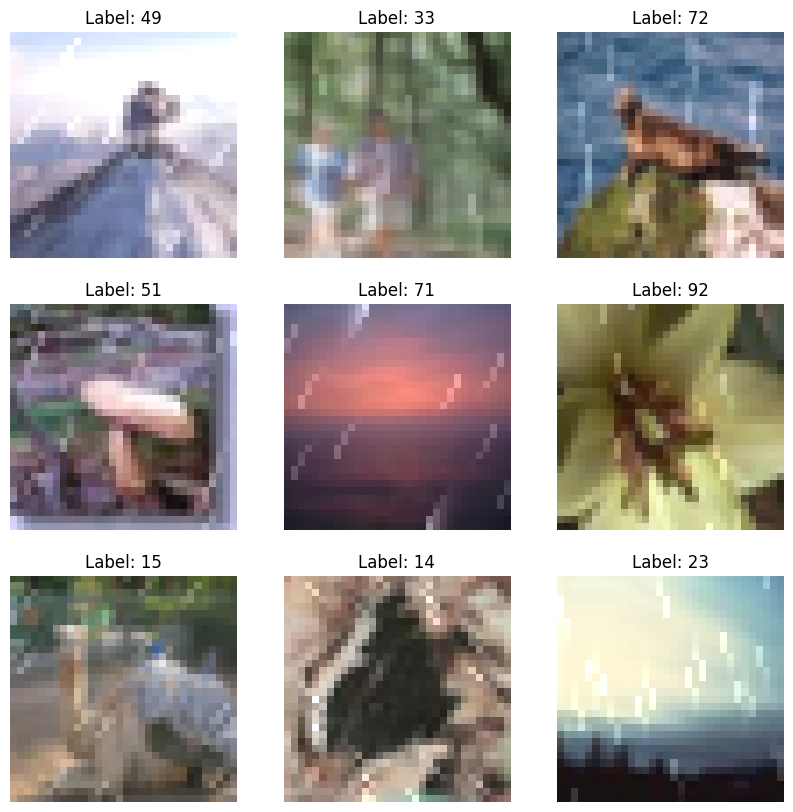

In [ ]:
# Print 9 images
plot_images(test_images, test_labels, num_images=9)

In [ ]:
# Convert NumPy arrays to PyTorch tensors
images_test_tensor = torch.from_numpy(test_images).to(torch.float).permute(0,3,1,2)
labels_test_tensor = torch.from_numpy(test_labels).to(torch.float)

print(f'Testing Images :{images_test_tensor.size()}')
print(f'Testing Labels :{labels_test_tensor.size()}')

# Create a PyTorch dataset
additional_test_dataset = TensorDataset(images_test_tensor, labels_test_tensor)

Testing Images :torch.Size([50000, 3, 32, 32])
Testing Labels :torch.Size([50000])


In [ ]:
batch_size = 32
additional_test_dataloader = DataLoader(additional_test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Evaluate the model On Test Dataset and eval mode

model = ResNet18().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load("model_1.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

total_correct = 0
total_images = 0

model.eval()
with torch.no_grad():

    for images, labels in additional_test_dataloader:

        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        predicted = torch.argmax(outputs,dim=1)
        total_correct += (predicted == labels).sum()
        total_images += labels.size()[0]


print('Additional Dataset')
print(r"Model Trained on TrainSet1 and Testing in $eval$ mode")
print(f'Batch Size = {batch_size}')
print(f'Testing Accuracy : {100 * total_correct / total_images :.4f} %')

Additional Dataset
Model Trained on TrainSet1 and Testing in $eval$ mode
Batch Size = 32
Testing Accuracy : 1.0080 %


In [ ]:
# Evaluate the model On Test Dataset and eval mode

model = ResNet18().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load("model_2.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

total_correct = 0
total_images = 0

model.eval()
with torch.no_grad():

    for images, labels in additional_test_dataloader:

        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        predicted = torch.argmax(outputs,dim=1)
        total_correct += (predicted == labels).sum()
        total_images += labels.size()[0]


print('Additional Dataset')
print('Model Trained on TrainSet2 and Testing in $eval$ mode')
print(f'Batch Size = {batch_size}')
print(f'Testing Accuracy : {100 * total_correct / total_images :.4f} %')

Additional Dataset
Model Trained on TrainSet2 and Testing in $eval$ mode
Batch Size = 32
Testing Accuracy : 1.0000 %


In [ ]:
# Evaluate the model On Test Dataset and train mode

model = ResNet18().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load("model_1.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

total_correct = 0
total_images = 0

model.train()

with torch.no_grad():

    for images, labels in additional_test_dataloader:

        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.argmax(outputs,dim=1)
        total_correct += (predicted == labels).sum()
        total_images += labels.size()[0]


print('Additional Dataset')
print('Model Trained on TrainSet1 and Testing in $train$ mode')
print(f'Batch Size = {batch_size}')
print(f'Testing Accuracy : {100 * total_correct / total_images :.4f} %')

Additional Dataset
Model Trained on TrainSet1 and Testing in $train$ mode
Batch Size = 32
Testing Accuracy : 19.8180 %


In [ ]:
# Evaluate the model On Test Dataset and train mode

model = ResNet18().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load("model_2.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

total_correct = 0
total_images = 0

model.train()
with torch.no_grad():
    for images, labels in additional_test_dataloader:

        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.argmax(outputs,dim=1)
        total_correct += (predicted == labels).sum()
        total_images += labels.size()[0]


print('Additional Dataset')
print(r'Model Trained on TrainSet2 and Testing in $train$ mode')
print(f'Batch Size = {batch_size}')
print(f'Testing Accuracy : {100 * total_correct / total_images :.4f} %')

Additional Dataset
Model Trained on TrainSet2 and Testing in $train$ mode
Batch Size = 32
Testing Accuracy : 29.8320 %


### **3. Self Supervised Learning**

In [5]:
# Transformations for SimCLR augmentation
simclr_transforms = transforms.Compose([
    transforms.RandomResizedCrop(96),  # Random resized crop to 32x32
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),  # Random color jitter
    transforms.RandomGrayscale(p=0.2),  # Random grayscale conversion
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.1),  # Random Gaussian blur
])

# Function to generate two augmented views
def augment_views(x):
    view1 = simclr_transforms(x)  # Apply SimCLR transformations to generate view 1
    view2 = simclr_transforms(x)  # Apply SimCLR transformations again to generate view 2
    return view1, view2

# Regular transformations for training set
regular_transforms = transforms.Compose([
    transforms.RandomResizedCrop(32),  # Random resized crop to 32x32
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.ToTensor(),  # Convert image to PyTorch tensor
])

# Load CIFAR-100 dataset for training
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=regular_transforms)

# Create trainset2 by subsampling trainset1 to a smaller size
trainset2_size = 25000
trainset2 = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=regular_transforms)
trainset2.targets = trainset.targets[:trainset2_size]  # Update targets for trainset2
trainset2.data = trainset.data[:trainset2_size]  # Update data for trainset2

batch_size = 32  # Define batch size
trainloader = torch.utils.data.DataLoader(trainset2, batch_size=batch_size, shuffle=True, num_workers=2)  # DataLoader for trainset2

Files already downloaded and verified
Files already downloaded and verified


In [6]:
class SimCLR(nn.Module):
    def __init__(self, proj_dim=256):
        super(SimCLR, self).__init__()
        # Initialize ResNet18 backbone
        self.resnet18 = models.resnet18(pretrained=True)
        # Remove the classification layer from ResNet18
        self.resnet18 = nn.Sequential(*list(self.resnet18.children())[:-1])
        # Projection head to map representations to lower-dimensional space
        self.projection_head = nn.Sequential(
            nn.Linear(512, 512),  # Linear layer with ReLU activation
            nn.ReLU(inplace=True),
            nn.Linear(512, proj_dim)  # Final linear layer to obtain projection
        )

    def forward(self, x1, x2):
        # Forward pass through ResNet18 backbone for both views
        repr_1 = self.resnet18(x1)
        repr_2 = self.resnet18(x2)
        # Forward pass through projection head for both representations
        repr_1 = self.projection_head(repr_1.view(repr_1.size(0), -1))  # Flatten and project
        repr_2 = self.projection_head(repr_2.view(repr_2.size(0), -1))  # Flatten and project
        return repr_1, repr_2

class SimCLRLoss(object):

    def __init__(self, temp = 0.5):
        self.n_views = 2
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.temperature = temp
        self.criterion = torch.nn.CrossEntropyLoss().to(self.device)

    def info_nce_loss(self, features):
        self.batch_size = features.size()[0]//self.n_views
        labels = torch.cat([torch.arange(self.batch_size) for i in range(self.n_views)], dim=0)
        labels = (labels.unsqueeze(0) == labels.unsqueeze(1)).float()
        labels = labels.to(self.device)

        features = Fun.normalize(features, dim=1)

        similarity_matrix = torch.matmul(features, features.T)

        # discard the main diagonal from both: labels and similarities matrix
        mask = torch.eye(labels.shape[0], dtype=torch.bool).to(self.device)
        labels = labels[~mask].view(labels.shape[0], -1)
        similarity_matrix = similarity_matrix[~mask].view(similarity_matrix.shape[0], -1)
        # assert similarity_matrix.shape == labels.shape

        # select and combine multiple positives
        positives = similarity_matrix[labels.bool()].view(labels.shape[0], -1)

        # select only the negatives the negatives
        negatives = similarity_matrix[~labels.bool()].view(similarity_matrix.shape[0], -1)

        logits = torch.cat([positives, negatives], dim=1)
        # labels = torch.zeros(logits.shape[0], dtype=torch.long).to(self.device)

        logits = logits / self.temperature
        return logits, labels

In [ ]:
simclr_model = SimCLR()
simclr_loss_fn = SimCLRLoss(temp=1)
simclr_optimizer = torch.optim.Adam(simclr_model.parameters(), lr=0.001)

num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
simclr_model.to(device)

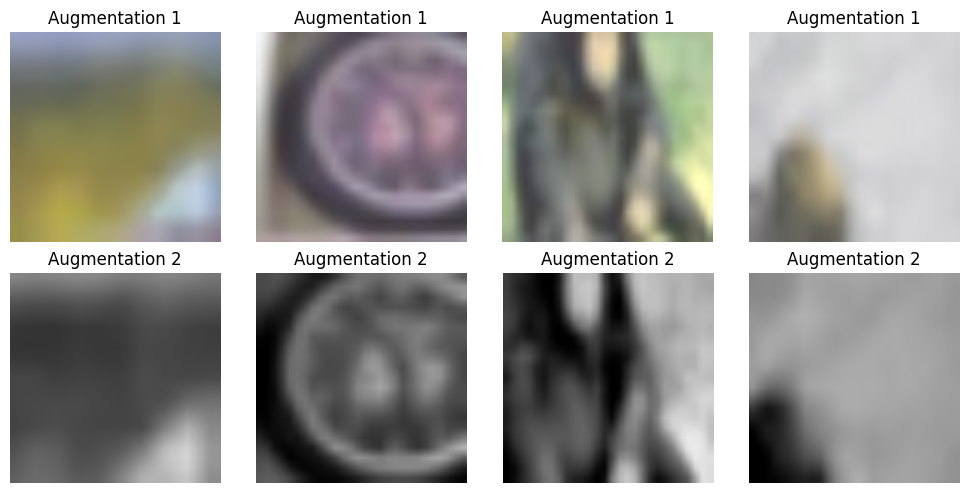

In [32]:
n = 4  # Number of original and augmented image pairs to display

for data in trainloader:
    images, _ = data
    # images = images.to(device)
    views_1,views_2 = augment_views(images)
    # views = [view.to(device) for view in views]

    plt.figure(figsize=(10, 5))

    # Display original and augmented image pairs in two rows
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(views_1[i].permute(1, 2, 0).to('cpu'))
        plt.title('Augmentation 1')
        plt.axis('off')

        plt.subplot(2, n, n + i + 1)  # Adjusted index for the second row
        plt.imshow(views_2[i].permute(1, 2, 0).to('cpu'))
        plt.title('Augmentation 2')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    break

In [42]:
for epoch in range(num_epochs):
    simclr_model.train()
    total_loss = 0.0  # Initialize total loss for the epoch
    num_batches = 0  # Initialize number of batches processed
    for data in tqdm(trainloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        images, _ = data
        views = augment_views(images)
        # views = [view.to(device) for view in views]
        repr_1, repr_2 = simclr_model(torch.Tensor(np.array(views)[0,:]).to(device),torch.Tensor(np.array(views)[1,:]).to(device))
        # dummy_labels = torch.zeros(repr_1.size(0)).to(torch.long).to(device)
        logits, labels = simclr_loss_fn.info_nce_loss(torch.cat((repr_1, repr_2),dim=0))
        simclr_loss = simclr_loss_fn.criterion(logits, labels)
        simclr_optimizer.zero_grad()
        simclr_loss.backward()
        simclr_optimizer.step()
        total_loss += simclr_loss.item()  # Accumulate loss
        num_batches += 1
    # Calculate average loss for the epoch
    avg_loss = total_loss / num_batches
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch 1/5: 100%|██████████| 782/782 [02:59<00:00,  4.35it/s]


Epoch [1/5], Loss: 4.1415


Epoch 2/5: 100%|██████████| 782/782 [03:04<00:00,  4.24it/s]


Epoch [2/5], Loss: 4.1413


Epoch 3/5: 100%|██████████| 782/782 [02:58<00:00,  4.39it/s]


Epoch [3/5], Loss: 4.1413


Epoch 4/5: 100%|██████████| 782/782 [03:01<00:00,  4.30it/s]


Epoch [4/5], Loss: 4.1413


Epoch 5/5: 100%|██████████| 782/782 [02:59<00:00,  4.36it/s]

Epoch [5/5], Loss: 4.1413


In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset1_size = 5000
trainset1 = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainset1.targets = trainset.targets[:trainset1_size]
trainset1.data = trainset.data[:trainset1_size]

batch_size = 32
trainloader1 = torch.utils.data.DataLoader(trainset1, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [9]:
# 1-5 Epochs

# Define Cross Entropy Loss function
ce_loss_fn = nn.CrossEntropyLoss()

# Create a new DataLoader for trainset1
train_loader1 = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

from torch.optim.lr_scheduler import StepLR

# Create a new optimizer and scheduler for fine-tuning
optimizer = torch.optim.Adam(simclr_model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

num_epochs = 5

for epoch in range(num_epochs):
    simclr_model.train()
    total_loss = 0.0  # Initialize total loss for the epoch
    num_batches = 0  # Initialize number of batches processed
    for data in tqdm(trainloader1, desc=f'Fine-tuning Epoch {epoch + 1}/{num_epochs}'):
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Forward pass on the SimCLR model to obtain representations
        reps, _ = simclr_model(images, images)

        # Fine-tune using Cross Entropy Loss
        outputs = reps
        loss = ce_loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # Accumulate loss
        num_batches += 1

    # Calculate average loss for the epoch
    avg_loss = total_loss / num_batches
    print(f'Fine-tuning Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')

    scheduler.step()

# Save the fine-tuned model if needed
torch.save(simclr_model.state_dict(), 'fine_tuned_simclr_model.pth')

Fine-tuning Epoch 1/5: 100%|██████████| 157/157 [01:01<00:00,  2.54it/s]


Fine-tuning Epoch [1/5], Loss: 4.2451


Fine-tuning Epoch 2/5: 100%|██████████| 157/157 [01:02<00:00,  2.52it/s]


Fine-tuning Epoch [2/5], Loss: 3.5629


Fine-tuning Epoch 3/5: 100%|██████████| 157/157 [01:01<00:00,  2.55it/s]


Fine-tuning Epoch [3/5], Loss: 3.2372


Fine-tuning Epoch 4/5: 100%|██████████| 157/157 [01:02<00:00,  2.51it/s]


Fine-tuning Epoch [4/5], Loss: 2.5957


Fine-tuning Epoch 5/5: 100%|██████████| 157/157 [01:01<00:00,  2.53it/s]

Fine-tuning Epoch [5/5], Loss: 2.2254


In [10]:
# Accuracy after 5 Epochs

test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

simclr_model.eval()

all_preds = []
all_gt_labels = []

with torch.no_grad():
    for data in tqdm(test_loader, desc='Evaluating on Test Set'):
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Forward pass on the SimCLR model to obtain representations
        reps, _ = simclr_model(images, images)

        # Assuming the output of the projection head is used for fine-tuning
        outputs = reps

        # Get predictions
        preds = torch.argmax(outputs, dim=1)

        # Collect predictions and labels
        all_preds.extend(preds.cpu().numpy())
        all_gt_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = (np.array(all_preds) == np.array(all_gt_labels)).mean()
print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")

Evaluating on Test Set: 100%|██████████| 313/313 [00:43<00:00,  7.18it/s]

Accuracy on Test Set: 27.81%


In [11]:
# 6-10 Epochs

# Define Cross Entropy Loss function
ce_loss_fn = nn.CrossEntropyLoss()

# Create a new DataLoader for trainset1
train_loader1 = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

from torch.optim.lr_scheduler import StepLR

# Create a new optimizer and scheduler for fine-tuning
optimizer = torch.optim.Adam(simclr_model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

num_epochs = 5

for epoch in range(num_epochs):
    simclr_model.train()
    total_loss = 0.0  # Initialize total loss for the epoch
    num_batches = 0  # Initialize number of batches processed
    for data in tqdm(trainloader1, desc=f'Fine-tuning Epoch {epoch + 1}/{num_epochs}'):
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Forward pass on the SimCLR model to obtain representations
        reps, _ = simclr_model(images, images)

        # Fine-tune using Cross Entropy Loss
        outputs = reps
        loss = ce_loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # Accumulate loss
        num_batches += 1

    # Calculate average loss for the epoch
    avg_loss = total_loss / num_batches
    print(f'Fine-tuning Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')

    scheduler.step()

# Save the fine-tuned model if needed
# torch.save(simclr_model.state_dict(), 'fine_tuned_simclr_model.pth')

Fine-tuning Epoch 1/5: 100%|██████████| 157/157 [01:05<00:00,  2.38it/s]


Fine-tuning Epoch [1/5], Loss: 2.7940


Fine-tuning Epoch 2/5: 100%|██████████| 157/157 [01:09<00:00,  2.27it/s]


Fine-tuning Epoch [2/5], Loss: 2.5204


Fine-tuning Epoch 3/5: 100%|██████████| 157/157 [01:06<00:00,  2.37it/s]


Fine-tuning Epoch [3/5], Loss: 2.2589


Fine-tuning Epoch 4/5: 100%|██████████| 157/157 [01:05<00:00,  2.40it/s]


Fine-tuning Epoch [4/5], Loss: 1.6130


Fine-tuning Epoch 5/5: 100%|██████████| 157/157 [01:10<00:00,  2.22it/s]

Fine-tuning Epoch [5/5], Loss: 1.2574


In [12]:
# Accuracy after 10 Epochs

test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

simclr_model.eval()

all_preds = []
all_gt_labels = []

with torch.no_grad():
    for data in tqdm(test_loader, desc='Evaluating on Test Set'):
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Forward pass on the SimCLR model to obtain representations
        reps, _ = simclr_model(images, images)

        # Assuming the output of the projection head is used for fine-tuning
        outputs = reps

        # Get predictions
        preds = torch.argmax(outputs, dim=1)

        # Collect predictions and labels
        all_preds.extend(preds.cpu().numpy())
        all_gt_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = (np.array(all_preds) == np.array(all_gt_labels)).mean()
print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")


Evaluating on Test Set: 100%|██████████| 313/313 [00:41<00:00,  7.46it/s]

Accuracy on Test Set: 30.00%
